In [1]:
%matplotlib widget

## Spatio-Temporal Clustering

In [2]:
import movekit as mkit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation

In [3]:
# Enter path to CSV file
path = "./datasets/fish-6.csv"

data = mkit.read_data(path)
data.head()

,time,animal_id,x,y
0,0,0,201.623002,186.148565
1,0,1,247.658670,177.650135
2,0,2,127.457230,20.572136
3,0,3,231.180722,172.861323
4,0,4,217.739517,189.203565


In [4]:
#normalize the data first
data_norm = mkit.normalize(data)

#then cluster it
labels = mkit.clustering('dbscan', data_norm, eps1=0.05, eps2=10, min_samples=2)

#OR cluster with the splitting-and-merging method
#labels = mkit.clustering_with_splits('dbscan', data, frame_size=20, eps1=0.05, eps2=10, min_samples=3)

In [5]:
labels

array([0, 0, 1, ..., 3, 0, 0], dtype=int64)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
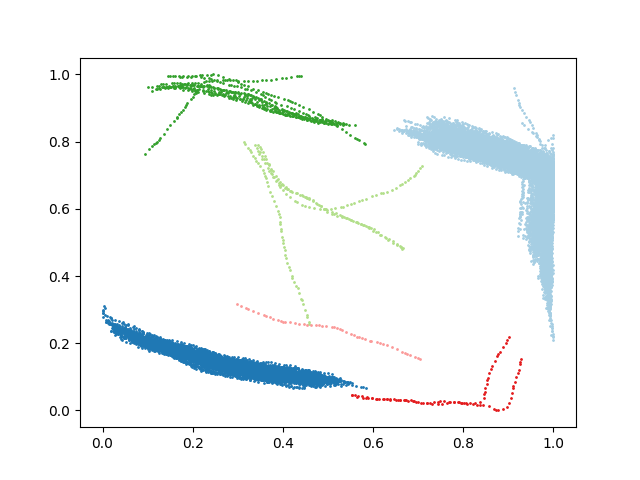

In [6]:
def plot(data, labels):
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
    
    for i in range(-1, len(set(labels))):
        if i == -1:
            col = [0, 0, 0, 1]
        else:
            col = colors[i % len(colors)]
        
        clust = data[np.where(labels==i)]
        plt.scatter(clust[:,0], clust[:,1], c=[col], s=1)
    plt.show()

    return None

data_np = data_norm.loc[:, ['time','x','y']].values
plot(data_np[:,1:], labels)